### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

from feature_engine import missing_data_imputers as mdi
# from feature_engine.outlier_removers import Winsorizer
# from feature_engine import categorical_encoders as ce
# from feature_engine import 

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("Madrid.csv",parse_dates=['CET'])

In [3]:
df

,CET,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,MeanSeaLevelPressurehPa,MinSeaLevelPressurehPa,MaxVisibilityKm,MeanVisibilityKm,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,MaxGustSpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.00,6.0,NaN,229
1,1997-02-01,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.00,5.0,Rain,143
2,1997-03-01,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.00,6.0,Snow,256
3,1997-04-01,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.00,2.0,NaN,284
4,1997-05-01,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.00,7.0,Snow,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,1035,1030,1027,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Snow,38
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,1031,1027,1023,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,1034,1030,1026,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Snow,190
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,1034,1029,1025,19.0,10.0,6.0,14,5,34.0,0.00,6.0,NaN,256


In [4]:
df.isnull().mean()

CET                        0.000000
MaxTemperatureC            0.000294
MeanTemperatureC           0.000440
MinTemperatureC            0.000294
DewPointC                  0.000294
MeanDewPointC              0.000294
MinDewpointC               0.000294
MaxHumidity                0.000294
MeanHumidity               0.000294
MinHumidity                0.000294
MaxSeaLevelPressurehPa     0.000000
MeanSeaLevelPressurehPa    0.000000
MinSeaLevelPressurehPa     0.000000
MaxVisibilityKm            0.137992
MeanVisibilityKm           0.137992
MinVisibilitykM            0.137992
MaxWindSpeedKm/h           0.000000
MeanWindSpeedKm/h          0.000000
MaxGustSpeedKm/h           0.485320
Precipitationmm            0.000000
CloudCover                 0.201409
Events                     0.736054
WindDirDegrees             0.000000
dtype: float64

In [5]:
imputer = mdi.RandomSampleImputer(random_state=0)

In [6]:
imputer.fit(df)

RandomSampleImputer(random_state=0,
                    variables=['CET', 'MaxTemperatureC', 'MeanTemperatureC',
                               'MinTemperatureC', 'DewPointC', 'MeanDewPointC',
                               'MinDewpointC', 'MaxHumidity', 'MeanHumidity',
                               'MinHumidity', 'MaxSeaLevelPressurehPa',
                               'MeanSeaLevelPressurehPa',
                               'MinSeaLevelPressurehPa', 'MaxVisibilityKm',
                               'MeanVisibilityKm', 'MinVisibilitykM',
                               'MaxWindSpeedKm/h', 'MeanWindSpeedKm/h',
                               'MaxGustSpeedKm/h', 'Precipitationmm',
                               'CloudCover', 'Events', 'WindDirDegrees'])

In [7]:
imputer.variables

['CET',
 'MaxTemperatureC',
 'MeanTemperatureC',
 'MinTemperatureC',
 'DewPointC',
 'MeanDewPointC',
 'MinDewpointC',
 'MaxHumidity',
 'MeanHumidity',
 'MinHumidity',
 'MaxSeaLevelPressurehPa',
 'MeanSeaLevelPressurehPa',
 'MinSeaLevelPressurehPa',
 'MaxVisibilityKm',
 'MeanVisibilityKm',
 'MinVisibilitykM',
 'MaxWindSpeedKm/h',
 'MeanWindSpeedKm/h',
 'MaxGustSpeedKm/h',
 'Precipitationmm',
 'CloudCover',
 'Events',
 'WindDirDegrees']

In [8]:
df2 = imputer.transform(df)
df2

,CET,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,MeanSeaLevelPressurehPa,MinSeaLevelPressurehPa,MaxVisibilityKm,MeanVisibilityKm,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,MaxGustSpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,53.0,0.00,6.0,Snow,229
1,1997-02-01,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.00,5.0,Rain,143
2,1997-03-01,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,42.0,0.00,6.0,Snow,256
3,1997-04-01,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.00,2.0,Snow,284
4,1997-05-01,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,64.0,0.00,7.0,Snow,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,1035,1030,1027,31.0,14.0,5.0,14,6,37.0,0.00,8.0,Snow,38
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,1031,1027,1023,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,1034,1030,1026,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Snow,190
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,1034,1029,1025,19.0,10.0,6.0,14,5,34.0,0.00,6.0,Rain,256


In [9]:
df2.isnull().mean()

CET                        0.0
MaxTemperatureC            0.0
MeanTemperatureC           0.0
MinTemperatureC            0.0
DewPointC                  0.0
MeanDewPointC              0.0
MinDewpointC               0.0
MaxHumidity                0.0
MeanHumidity               0.0
MinHumidity                0.0
MaxSeaLevelPressurehPa     0.0
MeanSeaLevelPressurehPa    0.0
MinSeaLevelPressurehPa     0.0
MaxVisibilityKm            0.0
MeanVisibilityKm           0.0
MinVisibilitykM            0.0
MaxWindSpeedKm/h           0.0
MeanWindSpeedKm/h          0.0
MaxGustSpeedKm/h           0.0
Precipitationmm            0.0
CloudCover                 0.0
Events                     0.0
WindDirDegrees             0.0
dtype: float64

In [10]:
#df2.to_csv("madridweather.csv",index=False)

### Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CET                      6812 non-null   datetime64[ns]
 1   MaxTemperatureC          6810 non-null   float64       
 2   MeanTemperatureC         6809 non-null   float64       
 3   MinTemperatureC          6810 non-null   float64       
 4   DewPointC                6810 non-null   float64       
 5   MeanDewPointC            6810 non-null   float64       
 6   MinDewpointC             6810 non-null   float64       
 7   MaxHumidity              6810 non-null   float64       
 8   MeanHumidity             6810 non-null   float64       
 9   MinHumidity              6810 non-null   float64       
 10  MaxSeaLevelPressurehPa   6812 non-null   int64         
 11  MeanSeaLevelPressurehPa  6812 non-null   int64         
 12  MinSeaLevelPressurehPa   6812 non-

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CET                      6812 non-null   datetime64[ns]
 1   MaxTemperatureC          6812 non-null   float64       
 2   MeanTemperatureC         6812 non-null   float64       
 3   MinTemperatureC          6812 non-null   float64       
 4   DewPointC                6812 non-null   float64       
 5   MeanDewPointC            6812 non-null   float64       
 6   MinDewpointC             6812 non-null   float64       
 7   MaxHumidity              6812 non-null   float64       
 8   MeanHumidity             6812 non-null   float64       
 9   MinHumidity              6812 non-null   float64       
 10  MaxSeaLevelPressurehPa   6812 non-null   int64         
 11  MeanSeaLevelPressurehPa  6812 non-null   int64         
 12  MinSeaLevelPressurehPa   6812 non-

In [13]:
df.describe()

,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,MeanSeaLevelPressurehPa,MinSeaLevelPressurehPa,MaxVisibilityKm,MeanVisibilityKm,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,MaxGustSpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
count,6810.000000,6809.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6812.000000,6812.000000,6812.000000,5872.000000,5872.000000,5872.000000,6812.000000,6812.000000,3506.000000,6812.000000,5440.000000,6812.000000
mean,21.039648,14.658687,8.640529,8.120705,4.976211,1.451248,81.139354,57.971366,34.729369,1020.529360,1017.973136,1015.217410,14.644074,11.719857,9.134877,21.953171,9.170728,43.988306,0.111182,3.206066,197.234586
std,8.867187,7.580461,6.837626,4.741067,4.654270,4.909705,17.531839,19.675744,19.320359,6.235941,6.480085,6.944745,8.770024,5.592324,5.075065,9.903914,5.110013,12.252462,0.967174,1.808948,119.872777
min,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,16.000000,15.000000,4.000000,994.000000,986.000000,965.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,-1.000000
25%,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,68.000000,41.000000,19.000000,1017.000000,1014.000000,1011.000000,10.000000,10.000000,7.000000,14.000000,6.000000,35.000000,0.000000,2.000000,66.000000
50%,20.000000,14.000000,9.000000,8.000000,6.000000,2.000000,87.000000,59.000000,32.000000,1020.000000,1018.000000,1015.000000,10.000000,10.000000,10.000000,21.000000,8.000000,42.000000,0.000000,3.000000,223.000000
75%,29.000000,21.000000,14.000000,12.000000,8.000000,5.000000,94.000000,74.000000,47.750000,1024.000000,1022.000000,1019.000000,10.000000,10.000000,10.000000,27.000000,11.000000,52.000000,0.000000,5.000000,299.000000
max,41.000000,32.000000,28.000000,20.000000,16.000000,14.000000,100.000000,100.000000,100.000000,1047.000000,1043.000000,1041.000000,31.000000,31.000000,31.000000,182.000000,39.000000,103.000000,32.000000,8.000000,360.000000


In [14]:
df2.describe()

,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,MeanSeaLevelPressurehPa,MinSeaLevelPressurehPa,MaxVisibilityKm,MeanVisibilityKm,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,MaxGustSpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.00000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000
mean,21.041398,14.659278,8.641809,8.121403,4.976806,1.451556,81.139607,57.97020,34.727833,1020.529360,1017.973136,1015.217410,14.637405,11.754110,9.155167,21.953171,9.170728,43.906342,0.111182,3.218732,197.234586
std,8.868857,7.580955,6.838082,4.740926,4.653748,4.909024,17.531984,19.67727,19.320331,6.235941,6.480085,6.944745,8.761413,5.660242,5.109418,9.903914,5.110013,12.348796,0.967174,1.805719,119.872777
min,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,16.000000,15.00000,4.000000,994.000000,986.000000,965.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,-1.000000
25%,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,68.000000,41.00000,19.000000,1017.000000,1014.000000,1011.000000,10.000000,10.000000,7.000000,14.000000,6.000000,35.000000,0.000000,2.000000,66.000000
50%,20.000000,14.000000,9.000000,8.000000,6.000000,2.000000,87.000000,59.00000,32.000000,1020.000000,1018.000000,1015.000000,10.000000,10.000000,10.000000,21.000000,8.000000,42.000000,0.000000,3.000000,223.000000
75%,29.000000,21.000000,14.000000,12.000000,8.000000,5.000000,94.000000,74.00000,48.000000,1024.000000,1022.000000,1019.000000,10.000000,10.000000,10.000000,27.000000,11.000000,52.000000,0.000000,5.000000,299.000000
max,41.000000,32.000000,28.000000,20.000000,16.000000,14.000000,100.000000,100.00000,100.000000,1047.000000,1043.000000,1041.000000,31.000000,31.000000,31.000000,182.000000,39.000000,103.000000,32.000000,8.000000,360.000000


In [15]:
df2.columns

Index(['CET', 'MaxTemperatureC', 'MeanTemperatureC', 'MinTemperatureC', 'DewPointC', 'MeanDewPointC', 'MinDewpointC', 'MaxHumidity', 'MeanHumidity', 'MinHumidity', 'MaxSeaLevelPressurehPa', 'MeanSeaLevelPressurehPa', 'MinSeaLevelPressurehPa', 'MaxVisibilityKm', 'MeanVisibilityKm', 'MinVisibilitykM', 'MaxWindSpeedKm/h', 'MeanWindSpeedKm/h', 'MaxGustSpeedKm/h', 'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'], dtype='object')

In [16]:
df["Events"].value_counts()

Rain    1141
Snow     657
Name: Events, dtype: int64

In [17]:
df2["Events"].value_counts()

Rain    4360
Snow    2452
Name: Events, dtype: int64

### Data Visualization

### Univariate Data Exploration

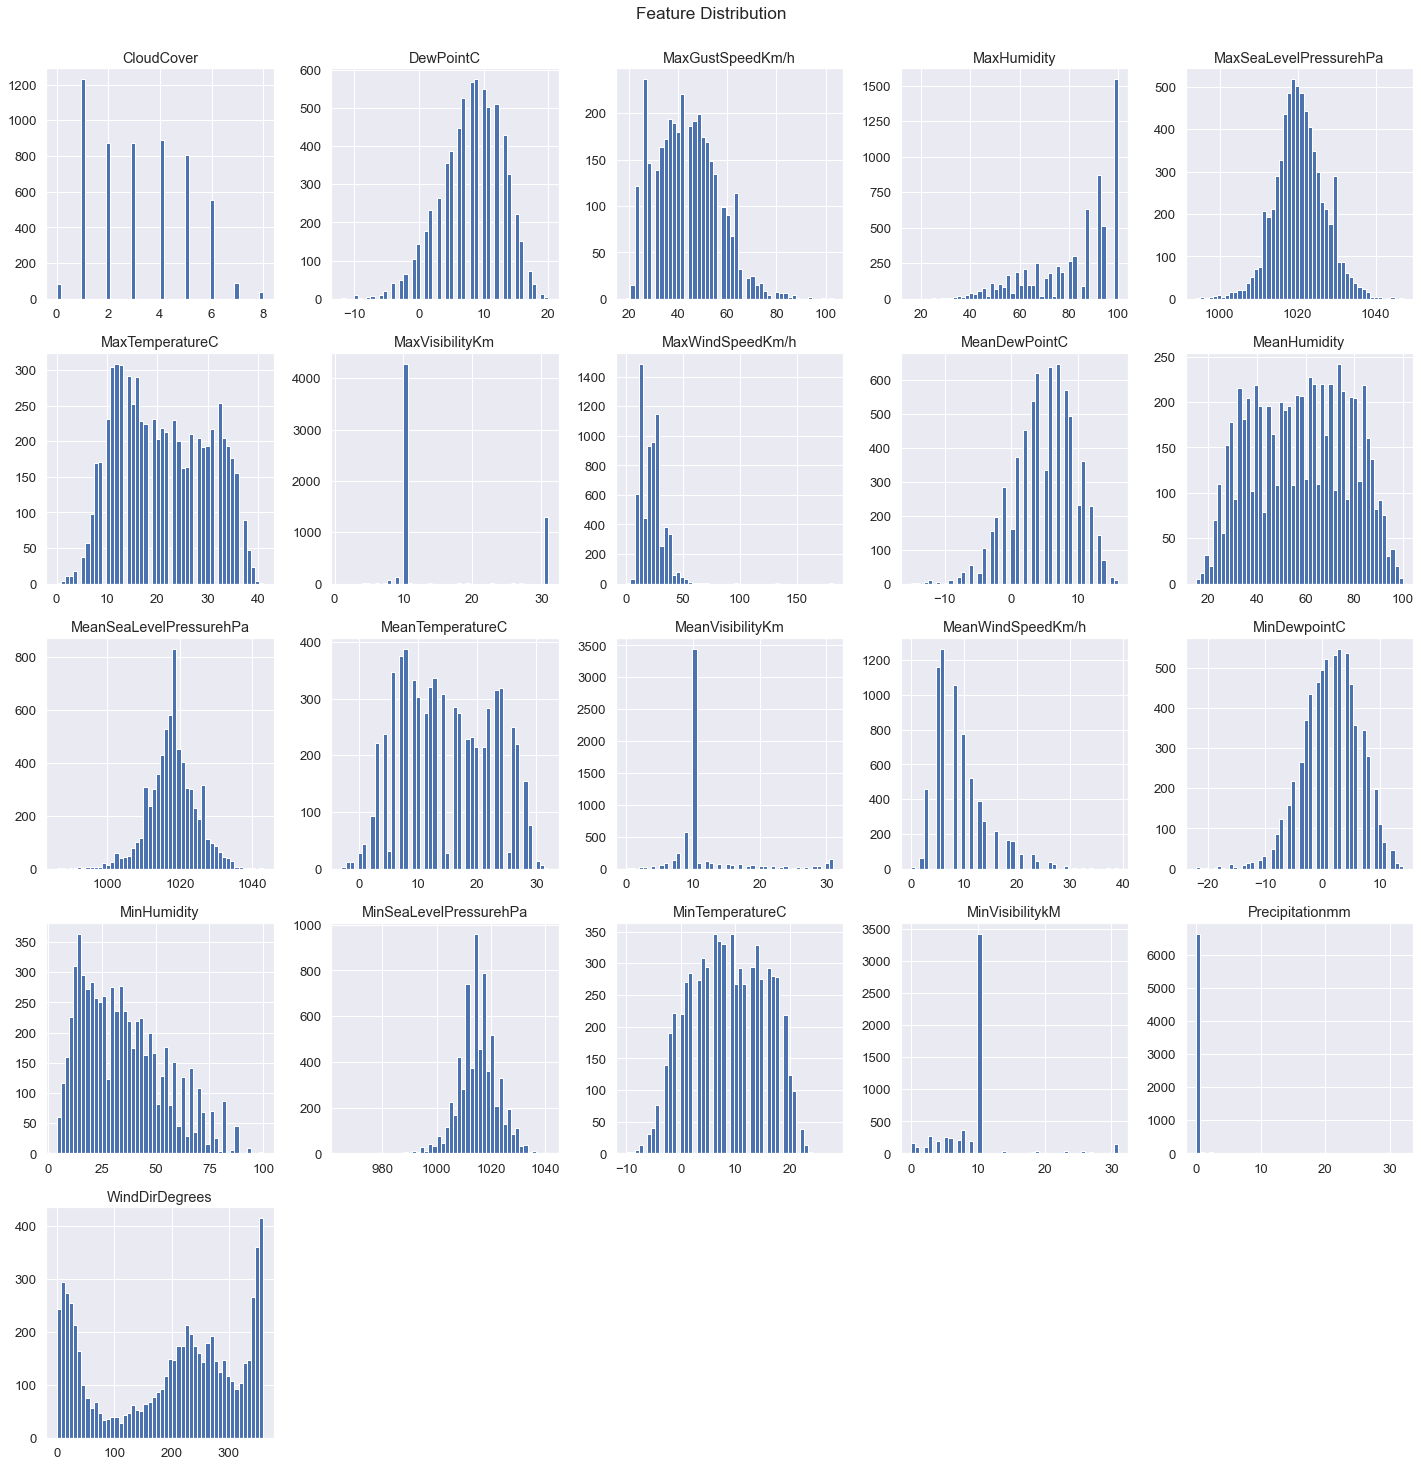

In [18]:
df.hist(bins=50, figsize=(20,20))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

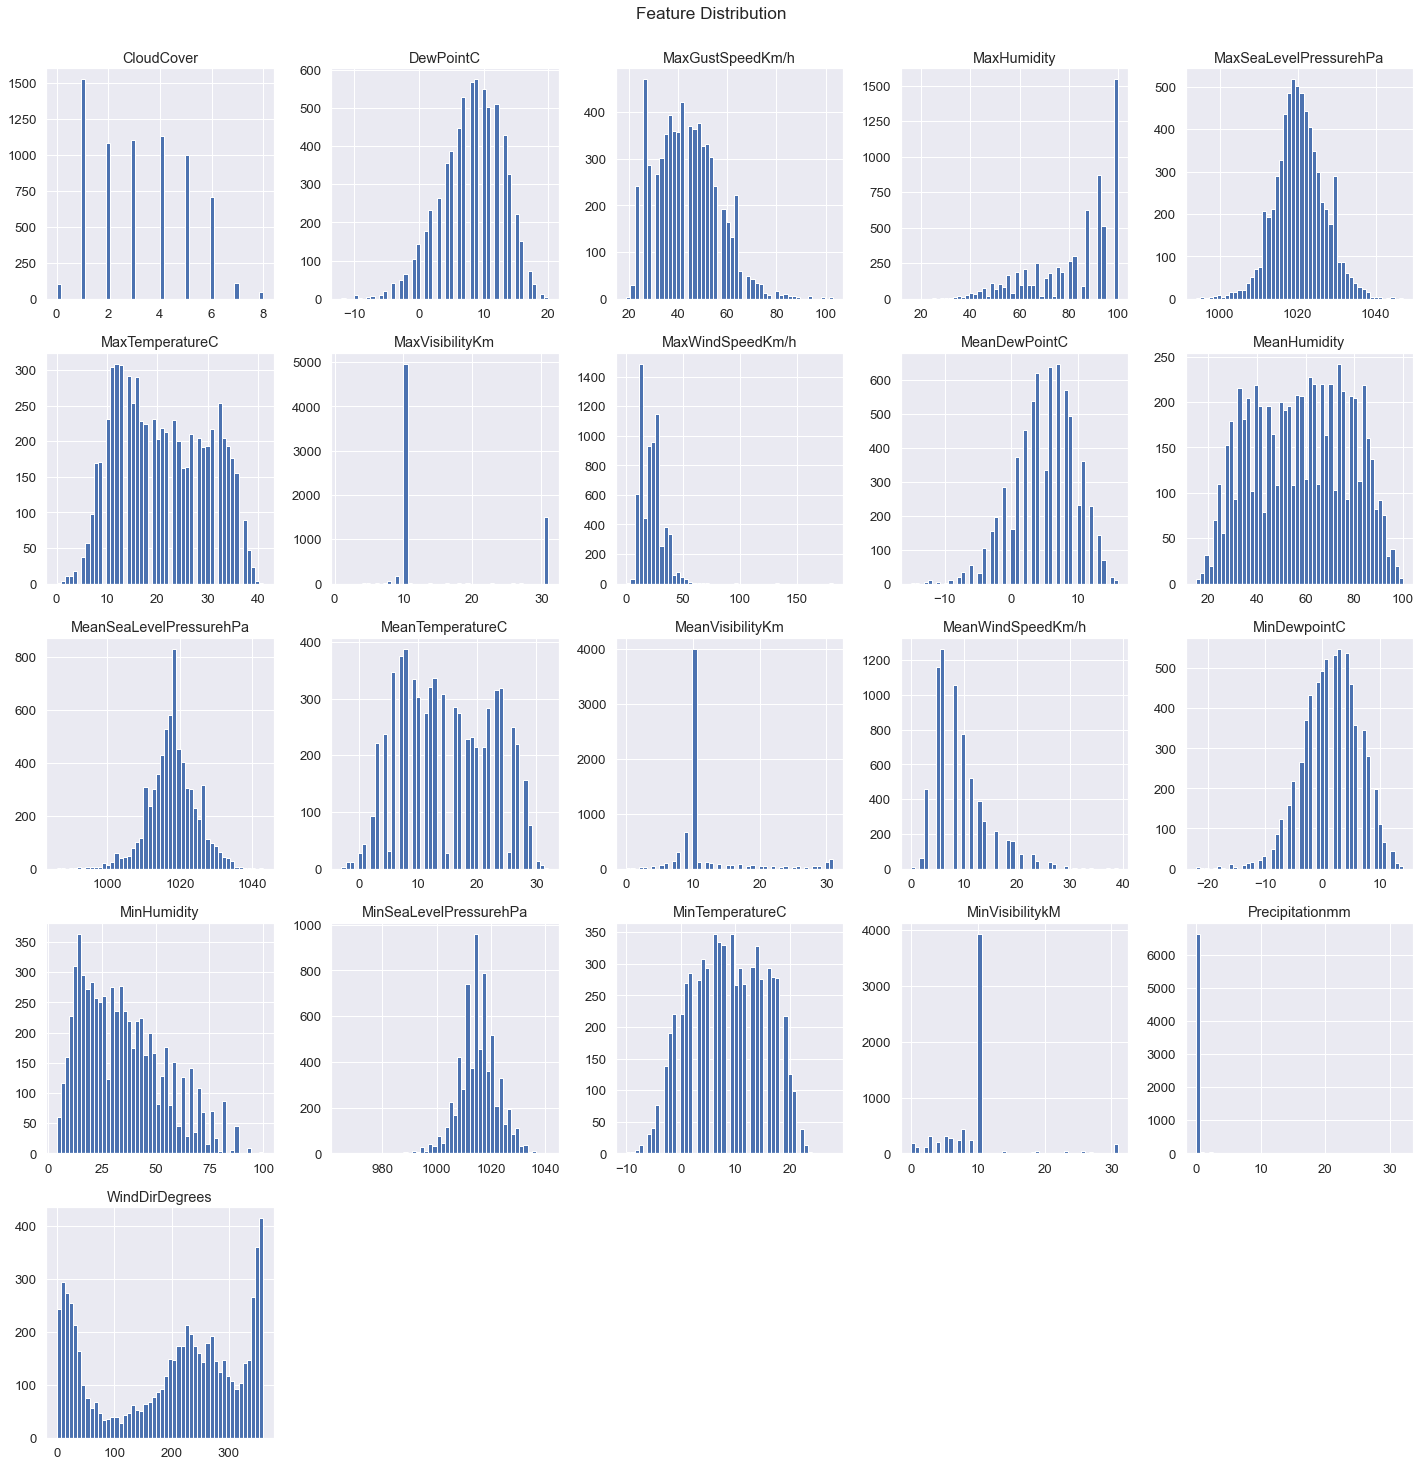

In [19]:
df2.hist(bins=50, figsize=(20,20))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

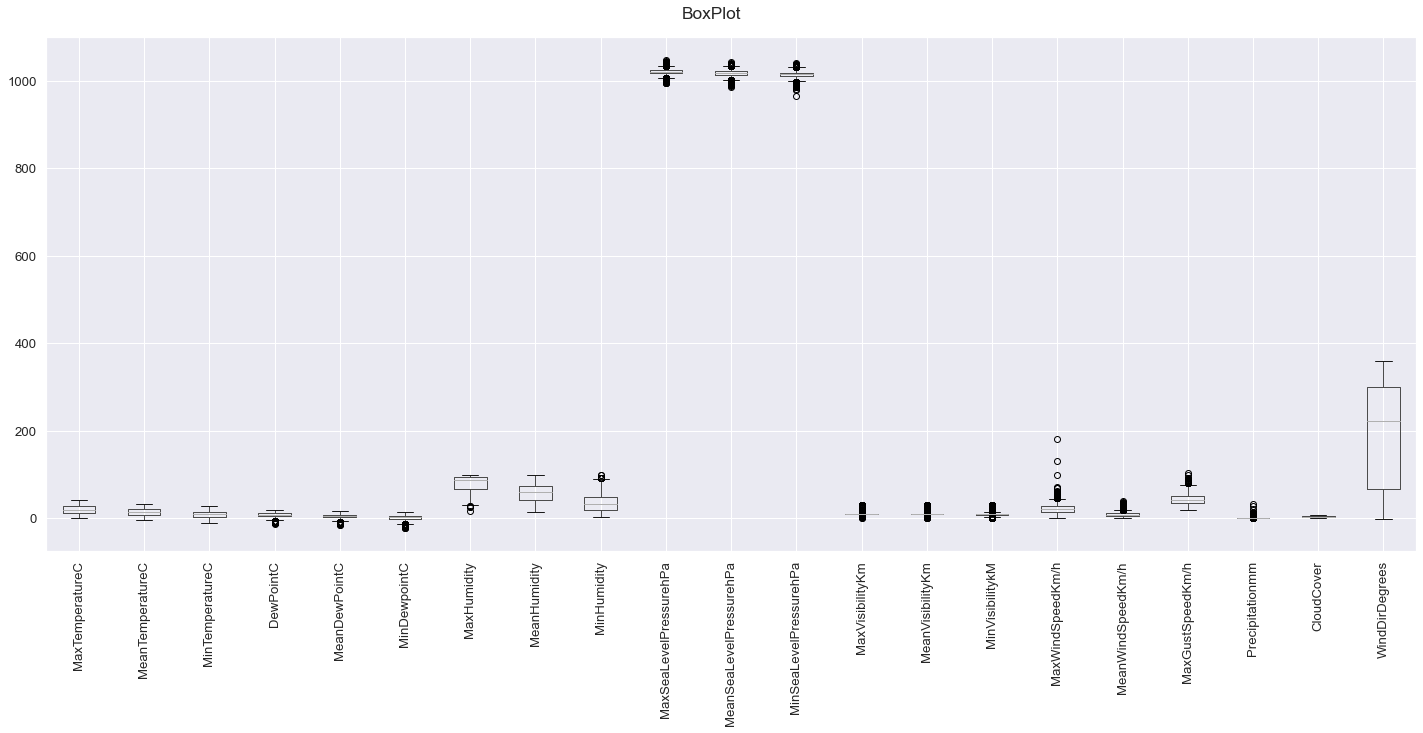

In [24]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

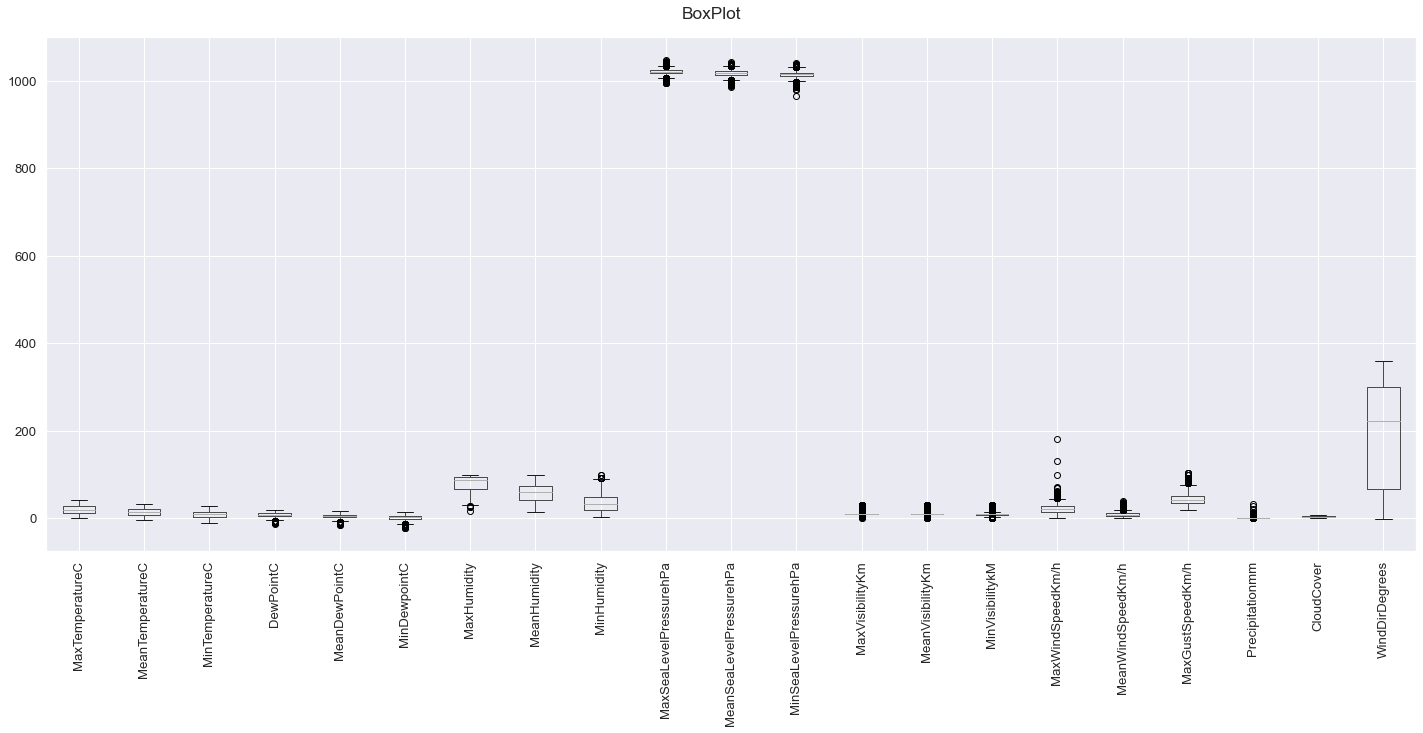

In [25]:
df2.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()